In [1]:
import pandas as pd

In [2]:
url = 'https://api.coronavirus.data.gov.uk/v2/data?areaType=nation&areaCode=E92000001&metric=uniqueCasePositivityBySpecimenDateRollingSum&metric=uniquePeopleTestedBySpecimenDateRollingSum&metric=newCasesBySpecimenDate&format=csv&release=2020-12-17'
data = pd.read_csv(url, index_col='date', parse_dates=['date'])
data

,areaType,areaCode,areaName,uniqueCasePositivityBySpecimenDateRollingSum,uniquePeopleTestedBySpecimenDateRollingSum,newCasesBySpecimenDate
date,,,,,,
2020-12-17,nation,E92000001,England,NaN,NaN,NaN
2020-12-16,nation,E92000001,England,NaN,NaN,1068.0
2020-12-15,nation,E92000001,England,NaN,NaN,10464.0
2020-12-14,nation,E92000001,England,NaN,NaN,26177.0
2020-12-13,nation,E92000001,England,NaN,NaN,17758.0
...,...,...,...,...,...,...
2020-01-07,nation,E92000001,England,NaN,NaN,NaN
2020-01-06,nation,E92000001,England,NaN,NaN,NaN
2020-01-05,nation,E92000001,England,NaN,NaN,NaN


In [3]:
data = data.sort_values(by = ['date', 'areaCode'])

In [4]:
filtered_data = data[data['uniqueCasePositivityBySpecimenDateRollingSum'].notnull()]
new_stats = filtered_data['uniquePeopleTestedBySpecimenDateRollingSum']*filtered_data['uniqueCasePositivityBySpecimenDateRollingSum']/100
old_stats = filtered_data['newCasesBySpecimenDate'].rolling(7).sum()

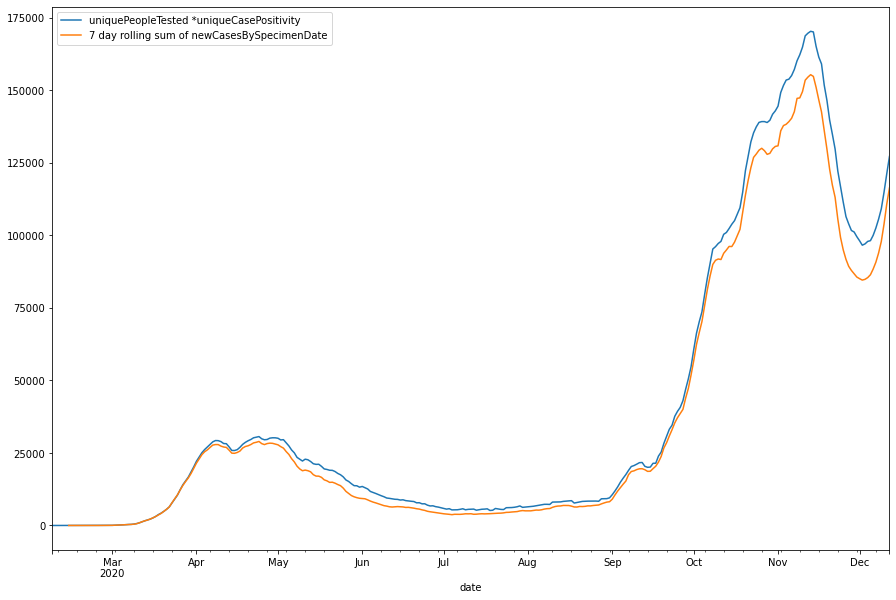

In [5]:
pd.DataFrame({
    'uniquePeopleTested *uniqueCasePositivity': new_stats,
    '7 day rolling sum of newCasesBySpecimenDate': old_stats,
}).plot(figsize=(15,10))

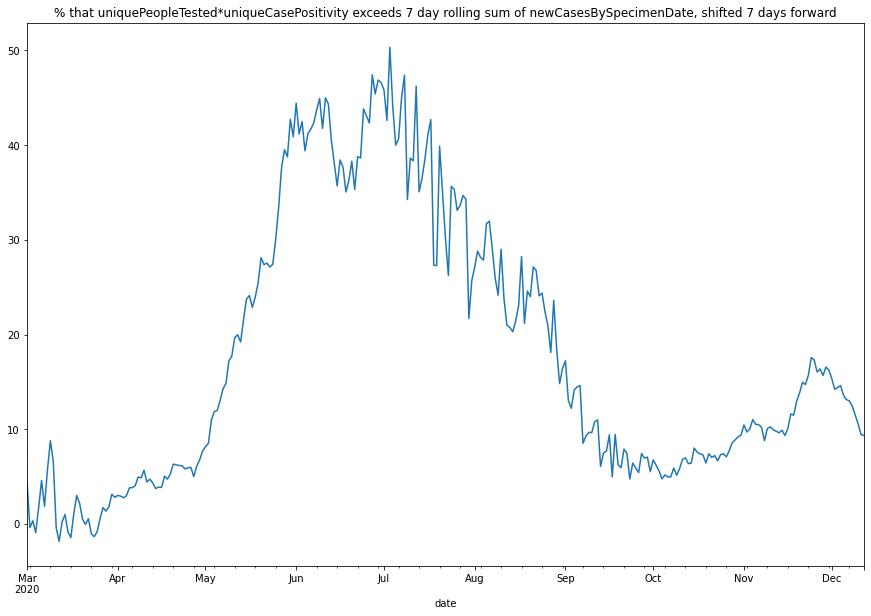

In [8]:
(100*((new_stats / old_stats)-1)).loc['2020-03-01':].plot(
    title='% that uniquePeopleTested*uniqueCasePositivity exceeds 7 '
    'day rolling sum of newCasesBySpecimenDate, shifted 7 days forward',
    figsize=(15,10)
)